In [24]:

import pandas as pd
import altair as alt

alt.data_transformers.disable_max_rows()
# Load the CSV file
file_path = "/Users/rahelehmosleh/Desktop/healthcare-dataset-stroke-data.xls"
df = pd.read_csv(file_path)

# Show the entire DataFrame in a clean table format
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [25]:
df.shape        # number of rows and columns
df.head()       # show first 5 rows
df.info()       # column types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [26]:
df.describe()


id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [27]:
df.describe(include='object')


gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

In [28]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [29]:
df['gender'].value_counts()



gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [30]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [31]:

df_scatter = alt.Chart(df).mark_point().encode(
    x="age",
    y=alt.Y("stroke").scale(zero=False)
)
df_scatter



alt.Chart(...)

In [32]:
df_scatter = alt.Chart(df).mark_point().encode(
    x="age",
    y=alt.Y("bmi").scale(zero=False)
)
df_scatter

alt.Chart(...)

In [33]:
df_scatter = alt.Chart(df).mark_point().encode(
    x="avg_glucose_level",
    y=alt.Y("bmi").scale(zero=False)
)
df_scatter

alt.Chart(...)

In [34]:
df_scatter = alt.Chart(df).mark_point().encode(
    x="avg_glucose_level",
    y=alt.Y("age").scale(zero=False)
)
df_scatter

alt.Chart(...)

In [35]:
df_scatter = alt.Chart(df).mark_point().encode(
    x="bmi",
    y=alt.Y("avg_glucose_level").scale(zero=False)
)
df_scatter

alt.Chart(...)

Data Cleaning & Preprocessing

In [36]:
# Drop rows with missing values (or impute them)
df = df.dropna()

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']


Normalize the feature values

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Split the Data

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [39]:
# Convert to float and NumPy arrays
# Drop the 'id' column before converting to NumPy
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])

# Convert to float and NumPy arrays
X_train_np = X_train.astype(float).to_numpy()
X_test_np = X_test.astype(float).to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Define feature names (after dropping 'id')
feature_names = X_train.columns

feature_names

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

Build a Deep Learning Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_np.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_np, y_train_np, epochs=50, batch_size=32,
                    validation_split=0.2, verbose=1)



Epoch 1/50


/Users/rahelehmosleh/anaconda3/envs/stroke_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 2.6271 - val_accuracy: 0.9580 - val_loss: 1.2878
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.9099 - loss: 1.2556 - val_accuracy: 0.9580 - val_loss: 0.4356
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9147 - loss: 0.6075 - val_accuracy: 0.9580 - val_loss: 0.2638
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.9271 - loss: 0.4275 - val_accuracy: 0.9580 - val_loss: 0.2069
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.9395 - loss: 0.3309 - val_accuracy: 0.9567 - val_loss: 0.2113
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9331 - loss: 0.3273 - val_accuracy: 0.9580 - val_loss: 0.2216
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.9417 - loss: 0.2636 - val_accuracy: 0.9580 - val_loss: 0.1786
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.9487 - loss: 0.2377 - val_accuracy: 0.9580 - val_lo

Evaluate Performance

In [41]:
# Evaluate on the test set
loss, accuracy = model.evaluate(X_test_np, y_test_np, verbose=1)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.9572 - loss: 0.1605
Test Loss: 0.1605
Test Accuracy: 0.9572


SHAP

PermutationExplainer explainer: 983it [00:28, 22.34it/s]                         
/var/folders/dk/j3ll34kx4233h20p0d_ld2t80000gn/T/ipykernel_62373/3786679466.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_np, feature_names=feature_names)


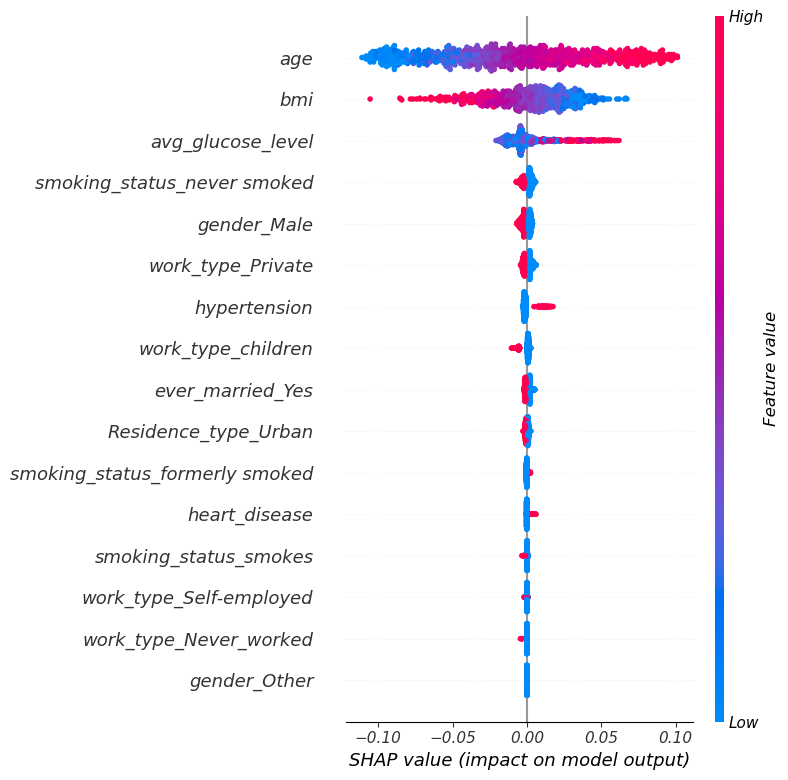

In [42]:
import shap

#feature_names = X.columns  # these are your one-hot encoded column names
feature_names = X_train.columns
explainer = shap.Explainer(model, X_train_np)
shap_values = explainer(X_test_np)

shap.summary_plot(shap_values, X_test_np, feature_names=feature_names)




Hyperparameter(systematic Method)

In [43]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train_np.shape[1],)
    ))
    model.add(Dropout(hp.Float('dropout_1', 0.0, 0.5, step=0.1)))
    
    # Try adding a variable number of hidden layers
    for i in range(hp.Int('num_layers', 1,5)):  # 1 to 3 hidden layers
        model.add(Dense(
            units=hp.Int(f'units_{i+2}', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(Dropout(hp.Float(f'dropout_{i+2}', 0.0, 0.5, step=0.1)))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Set up tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,       # try more combinations
    executions_per_trial=3,
    directory='my_tuning_dir',
    project_name='stroke_model_tuning'
)


# Search for best hyperparameters
tuner.search(X_train_np, y_train_np, epochs=50, validation_split=0.2, verbose=1)

# Retrieve best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
for key, value in best_hps.values.items():
    print(f"{key}: {value}")


Reloading Tuner from my_tuning_dir/stroke_model_tuning/tuner0.json
Best hyperparameters:
units_1: 192
dropout_1: 0.5
num_layers: 1
units_2: 128
dropout_2: 0.4
optimizer: rmsprop
units_3: 64
dropout_3: 0.5
units_4: 128
dropout_4: 0.2


/Users/rahelehmosleh/anaconda3/envs/stroke_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/rahelehmosleh/anaconda3/envs/stroke_env/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [44]:
history = best_model.fit(
    X_train_np, y_train_np,
    epochs=50,
    batch_size=32,
    validation_split=0.2,   # or use your validation set if separate
    verbose=1
)


Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9373 - loss: 0.3758 - val_accuracy: 0.9580 - val_loss: 0.2133
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.9500 - loss: 0.2699 - val_accuracy: 0.9517 - val_loss: 0.2918
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.9519 - loss: 0.2330 - val_accuracy: 0.9580 - val_loss: 0.1881
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.9557 - loss: 0.2245 - val_accuracy: 0.9313 - val_loss: 0.2819
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.9529 - loss: 0.2217 - val_accuracy: 0.9491 - val_loss: 0.2670
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.9567 - loss: 0.2208 - val_accuracy: 0.9491 - val_loss: 0.2550
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9573 - loss: 0.2079 - val_accuracy: 0.9580 - val_loss: 0.1902
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9567 - loss: 0.1987 - val_accuracy: 0.95

In [45]:
# Evaluate on the test set
loss, accuracy = best_model.evaluate(X_test_np, y_test_np, verbose=1)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.9572 - loss: 0.1615
Test Loss: 0.1615
Test Accuracy: 0.9572


PermutationExplainer explainer: 983it [00:38, 18.65it/s]                         
/var/folders/dk/j3ll34kx4233h20p0d_ld2t80000gn/T/ipykernel_62373/980608748.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_np, feature_names=feature_names)


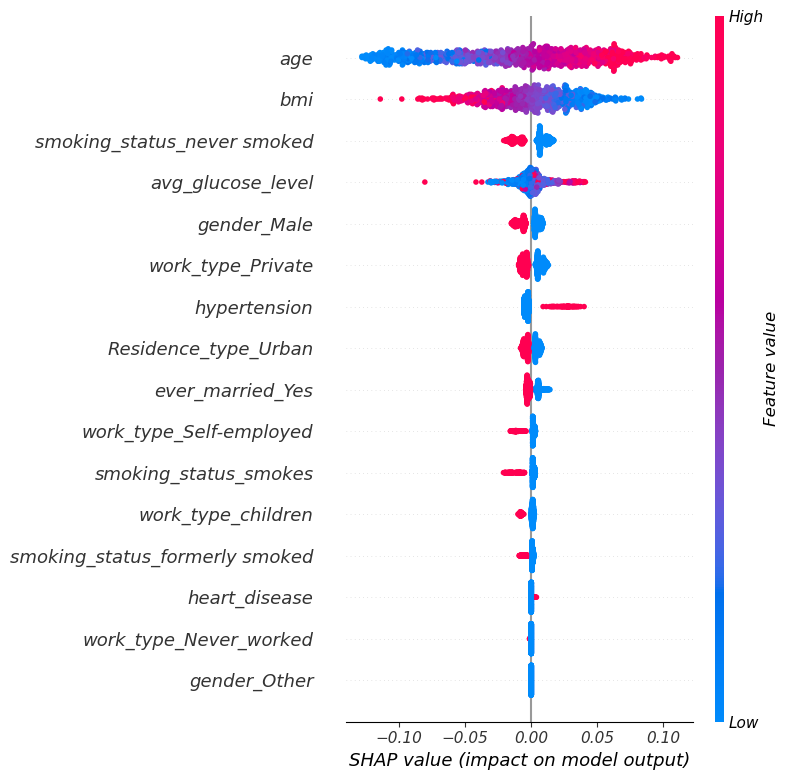

In [46]:
import shap

# Make sure you use the trained model
explainer = shap.Explainer(best_model, X_train_np)

# Compute SHAP values for test data
shap_values = explainer(X_test_np)

# Plot SHAP summary
feature_names = X_train.columns
shap.summary_plot(shap_values, X_test_np, feature_names=feature_names)
